In [137]:
import pandas as pd
import seaborn as sns
import os
import os.path as osp
import matplotlib.pyplot as plt

In [138]:
path = "results/cifar10/resnet34"
seeds = ['1', '2', '3']
gname = 'graph_seed-'
sname = 'summary-'

In [139]:
def get_csv(seed):
    graphs = pd.read_csv(osp.join(path, gname+seed+'.csv'))
    summary = pd.read_csv(osp.join(path, sname+seed+'.csv'))
    return graphs, summary

In [174]:
graphs, summary = get_csv('1')

In [176]:
def line_plot(m:pd.DataFrame, x:str, y:str, hue:str, dst:str=None, filter_by = None,title:str=None, ylim=(-1, 1)):
    # c = sns.color_palette("flare", as_cmap=True)\
    plt.figure(figsize=(12,8))
    if filter_by:
        masks = None
        for cond in filter_by:
            mask = m.prune_type.str.contains(cond)
            if masks is None: masks=mask
            else:
                masks |= mask
        m = m[masks]
    g= sns.lineplot(data=m,x=x,y=y,hue=hue,)
    plt.xticks(rotation=90)
    if title:
        g.set(title=title)
    plt.ylim(ylim)
    if dst:
        savefig(dst, title)

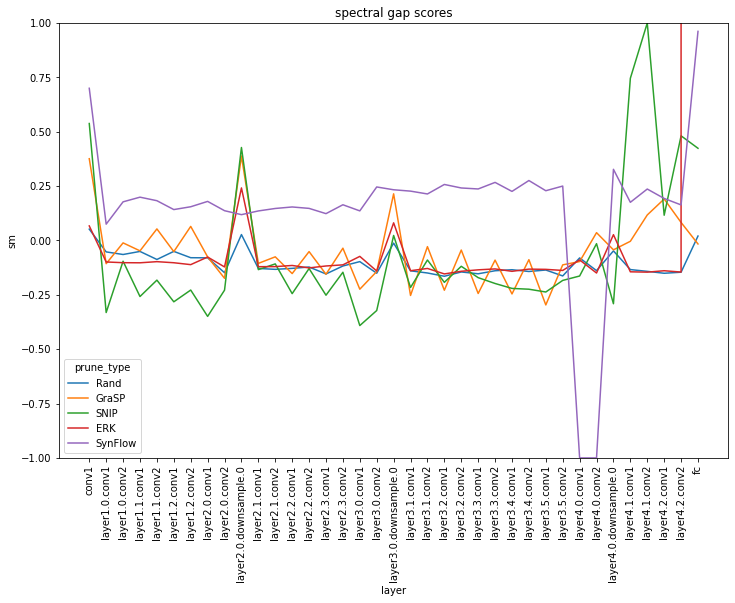

In [177]:
line_plot(graphs, x='layer', y='sm', hue='prune_type', title='spectral gap scores')

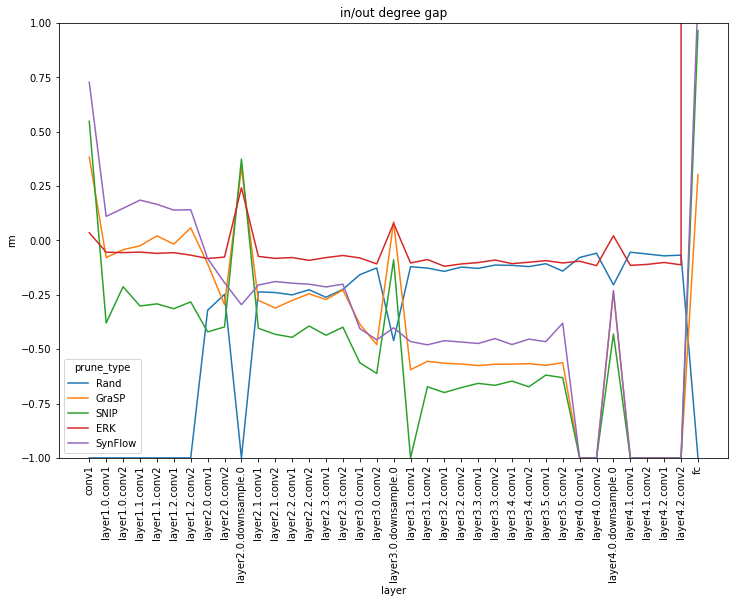

In [178]:
line_plot(graphs, x='layer', y='rm', hue='prune_type', title='in/out degree gap')

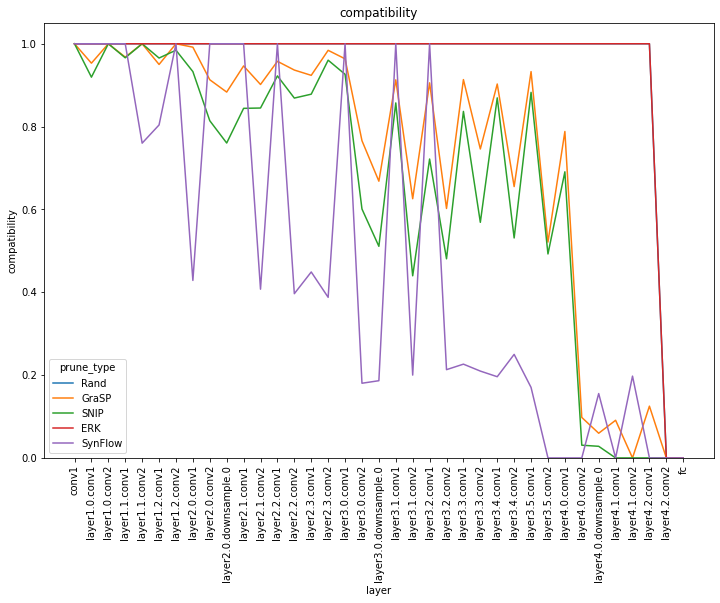

In [179]:
line_plot(graphs, x='layer', y='compatibility', hue='prune_type', title='compatibility', ylim=(0,1.05))

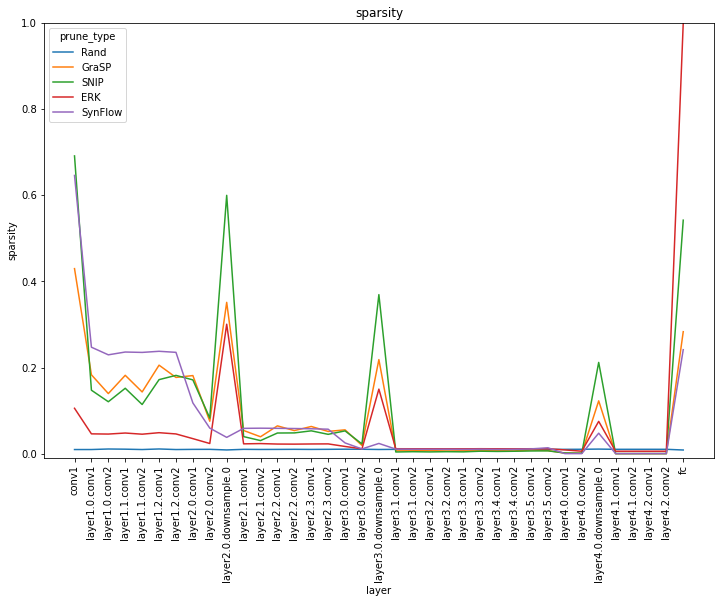

In [180]:
line_plot(graphs, x='layer', y='sparsity', hue='prune_type', title='sparsity', ylim=(-0.01, 1.0))

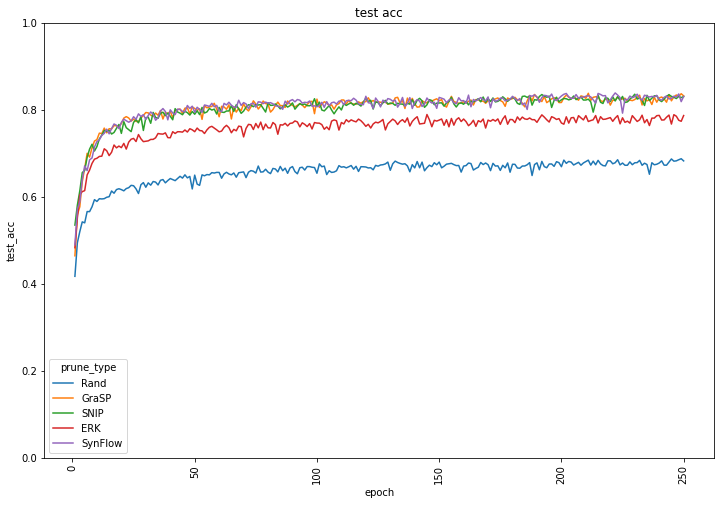

In [186]:
line_plot(summary, x='epoch', y='test_acc', hue='prune_type', title='test acc', ylim=(-0.0, 1.0))

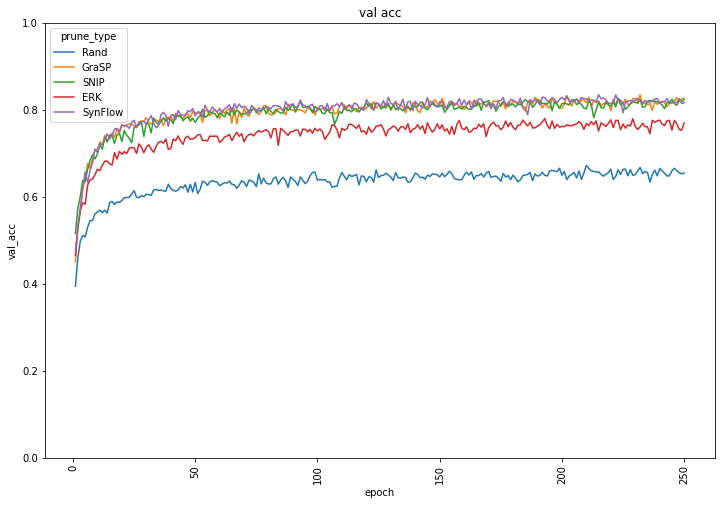

In [187]:
line_plot(summary, x='epoch', y='val_acc', hue='prune_type', title='val acc', ylim=(-0.0, 1.0))

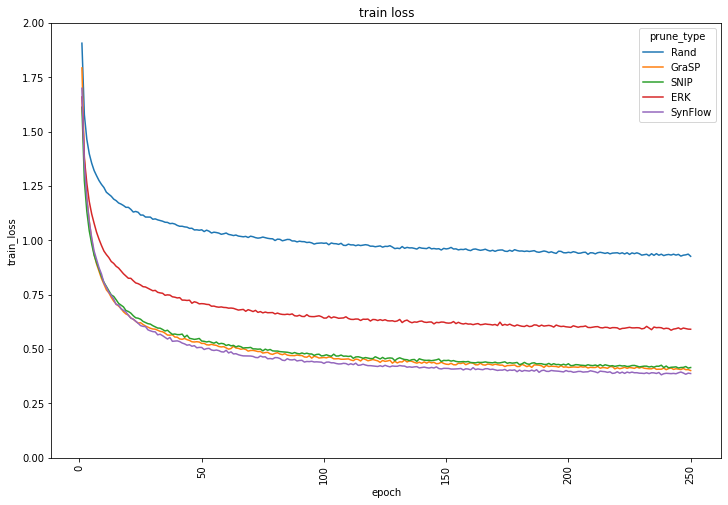

In [189]:
line_plot(summary, x='epoch', y='train_loss', hue='prune_type', title='train loss', ylim=(-0.0, 2))